In [54]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
from math import floor
from scipy.stats import norm
from datetime import datetime, timedelta

In [100]:
def save_for_n_years_df(df, start_date, end_date, dca_monthly_investment_amount, dca_investment_frequency_per_month):
    
    df = df[df['Date'] < end_date]
    df = df[df['Date'] >= start_date]
    df = df.set_index(pd.DatetimeIndex(df['Date'])).resample(f"{floor(30 / dca_investment_frequency_per_month)}D").agg('first')
    period_last_open = df.iloc[-1]['Open']
    df['added_capital'] = dca_monthly_investment_amount / dca_investment_frequency_per_month
    df['value_period_end'] = df['added_capital'] * (period_last_open / df['Open'])
    return {"start_date": df.iloc[0]['Date'], "end_date": df.iloc[-1]['Date'], "investment_frequency": floor(30 / dca_investment_frequency_per_month), "value": df['value_period_end'].sum()}


#From what date we will start run our simulations
simulation_start_date = datetime(1927, 12, 30)

#Until what date we will run our simulations
simulation_end_date = datetime(1997, 12, 31)

#What investment frequencies to test - 4/month, 1/month, every two months, every three months
investment_frequencies_per_month = [30, 15, 8]

#Read file containing S&P500 historical data
file = r'C:\Users\anton\Documents\investment_analysis\data\SPX.csv'
df = pd.read_csv(file, index_col=None, header=0)

#Date column is String, convert to Python Datetime
df['Date'] = pd.to_datetime(df['Date'])

#Results will go here
result = []

#Loop through each investment frequency
for investment_frequency_per_month in investment_frequencies_per_month:
    
    #Set current date to our simulation start date
    simulation_current_date = simulation_start_date
    
    print(f"Testing investment frequency of {floor(30 / investment_frequency_per_month)} days")

    #Simulate starting investing
    while simulation_current_date < simulation_end_date:
    
        #Save result - Start date, end date, current frequency and value
        result.append(save_for_n_years_df(df, simulation_current_date, simulation_current_date + timedelta(days=365*25), 10000, investment_frequency_per_month))
    
        #Start simulating from 
        simulation_current_date = simulation_current_date + timedelta(days=1)
    
#Convert results to df
results_df = pd.DataFrame(result)

Testing investment frequency of 1 days
Testing investment frequency of 2 days
Testing investment frequency of 3 days


# Show result for each invesstment frequency

In [101]:
#Find the best frequency for investing
results_df.groupby('investment_frequency').agg({'value' : ['mean', 'min', 'max', 'median']})

value                                          
                              mean           min           max        median
investment_frequency                                                        
1                     6.281136e+06  2.615649e+06  1.606348e+07  5.821119e+06
2                     7.674275e+06  3.202953e+06  1.953898e+07  7.143955e+06
3                     1.121780e+07  4.687745e+06  2.850801e+07  1.044011e+07

# Show best results

In [102]:
results_df.sort_values(by=['value'], inplace=True, ascending=False)
results_df.tail()

,start_date,end_date,investment_frequency,value
10824,1957-08-19,1982-08-11,1,2.627724e+06
10825,1957-08-19,1982-08-12,1,2.622180e+06
10826,1957-08-20,1982-08-13,1,2.617153e+06
10827,1957-08-21,1982-08-13,1,2.616399e+06
10828,1957-08-22,1982-08-13,1,2.615649e+06


# Plot graph

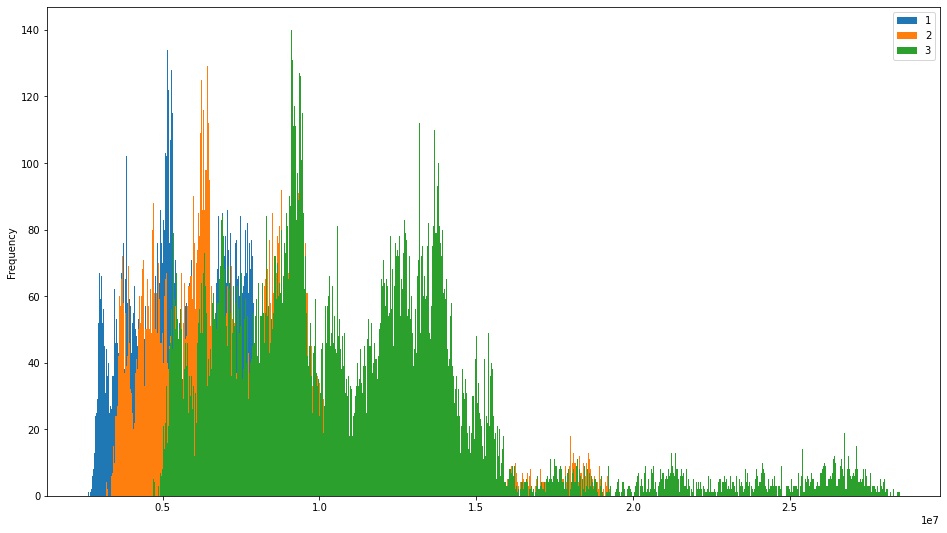

In [103]:
fig, ax = plt.subplots()
for key, grp in results_df.groupby(['investment_frequency']):
    ax = grp.plot(ax = ax, kind='hist', x='start_date', y='value', label = key, figsize=(16,9), bins=1000)
plt.show()

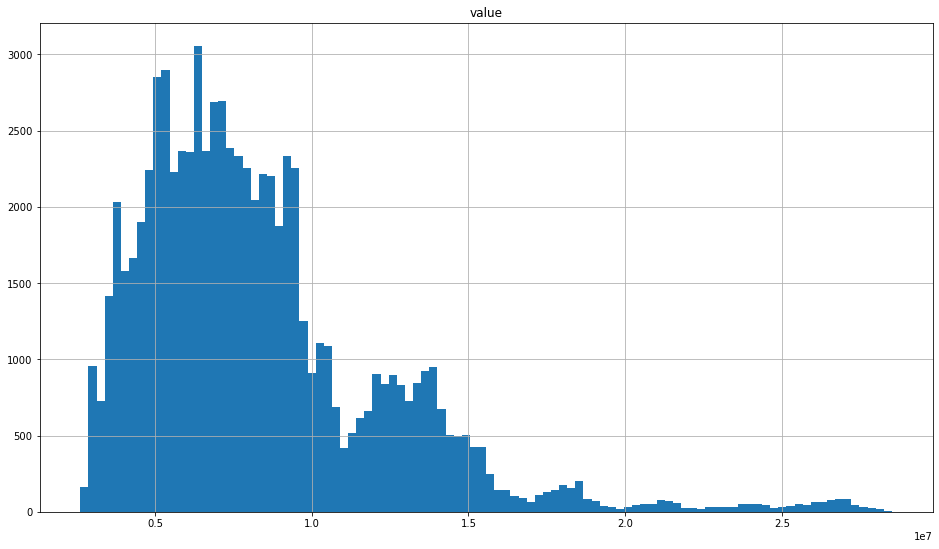

In [105]:
ax = results_df.hist(column='value', bins=100, figsize=(16,9))

## Create historgram showing 95% interval

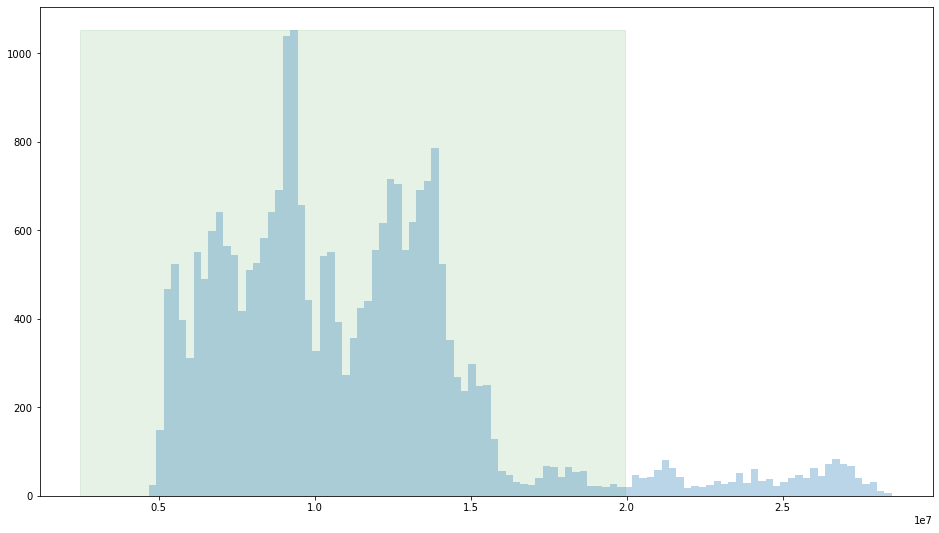

In [108]:
test_df = results_df[results_df['investment_frequency'] == 3]
arr = test_df['value']
plt.figure(figsize=(16,9))
ci = norm(*norm.fit(arr)).interval(0.95)  # fit a normal distribution and get 95% c.i.
height, bins, patches = plt.hist(arr, alpha=0.3, bins=100)
plt.fill_betweenx([0, height.max()], ci[0], ci[1], color='g', alpha=0.1)

## Show histogram 95% for all

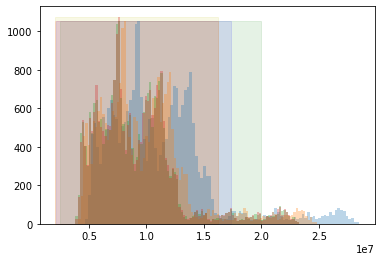

In [94]:
fig, ax = plt.subplots()
color_index = 0
colors = ['g', 'b', 'r', 'y']

for key, grp in results_df.groupby(['investment_frequency']):
    arr = grp['value']
    ci = norm(*norm.fit(arr)).interval(0.95)  # fit a normal distribution and get 95% c.i.
    height, bins, patches = plt.hist(arr, alpha=0.3, bins=100)
    plt.fill_betweenx([0, height.max()], ci[0], ci[1], color=colors[color_index], alpha=0.1)
    color_index += 1
plt.show()